In [1]:
# importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loadind the data
train = pd.read_csv('Data/bike_rental.csv')

In [3]:
train.shape

(12980, 12)

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 12 columns):
datetime      12980 non-null object
season        12980 non-null int64
holiday       12980 non-null int64
workingday    12980 non-null int64
weather       12980 non-null int64
temp          12980 non-null float64
atemp         12980 non-null float64
humidity      12980 non-null float64
windspeed     12980 non-null float64
casual        12980 non-null int64
registered    12980 non-null int64
count         12980 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


In [6]:
train.isnull().sum().sum()

0

In [7]:
# extracting date, hour and month from the datetime
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [8]:

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,2011-01-01,4,1


In [9]:
train = train.drop(['datetime','date'],axis=1)

In [10]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,0,1
1,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,1,1
2,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2,1
3,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,3,1
4,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,4,1


In [11]:
train['hour'] = train['hour'].astype(int)

<AxesSubplot:>

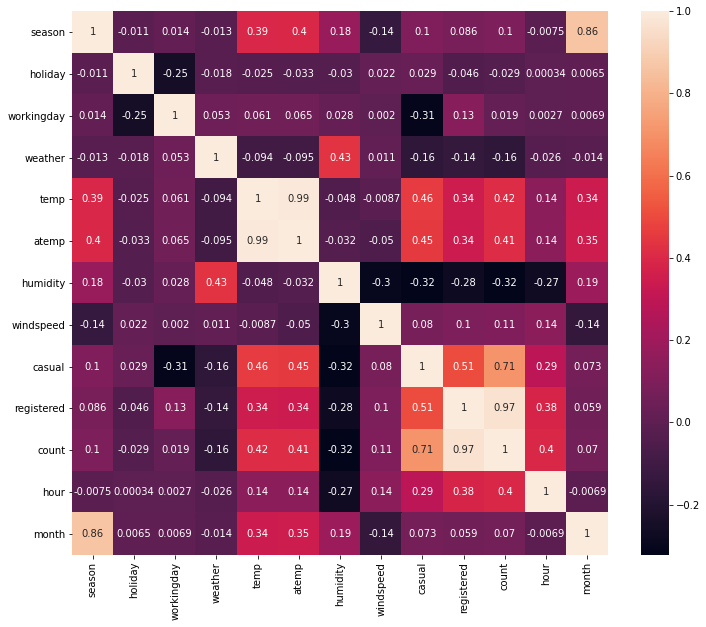

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(),annot=True)

In [13]:
corr_matrix = abs(train.corr())
print(corr_matrix["count"].sort_values(ascending=False))

count         1.000000
registered    0.968329
casual        0.707938
temp          0.415938
atemp         0.412644
hour          0.397006
humidity      0.322269
weather       0.161018
windspeed     0.105607
season        0.100687
month         0.069807
holiday       0.029340
workingday    0.018842
Name: count, dtype: float64


In [14]:
train = train.drop(['atemp','workingday','holiday','month'],axis=1)

In [15]:
train.head()

,season,weather,temp,humidity,windspeed,casual,registered,count,hour
0,1,1,9.84,81.0,0.0,3,13,16,0
1,1,1,9.02,80.0,0.0,8,32,40,1
2,1,1,9.02,80.0,0.0,5,27,32,2
3,1,1,9.84,75.0,0.0,3,10,13,3
4,1,1,9.84,75.0,0.0,0,1,1,4


In [16]:
train.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [17]:
# sns.pairplot(train)

In [18]:
train.describe()

,season,weather,temp,humidity,windspeed,casual,registered,count,hour
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,1.426656,19.725422,62.358552,13.141760,32.441757,135.136055,167.577812,11.554545
std,1.053046,0.647955,7.828902,19.963696,8.325987,46.636228,131.921431,160.758887,6.911950
min,1.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,13.120000,47.000000,7.001500,3.000000,30.000000,35.000000,6.000000
50%,2.000000,1.000000,19.680000,62.000000,12.998000,14.000000,103.000000,124.000000,12.000000
75%,3.000000,2.000000,26.240000,79.000000,19.001200,42.000000,194.000000,245.000000,18.000000
max,4.000000,4.000000,40.180000,100.000000,56.996900,367.000000,796.000000,957.000000,23.000000


In [19]:
X = train.drop('count',axis=1)
y = train['count']

In [20]:
from sklearn.model_selection import train_test_split
X_trn,X_test,y_trn,y_test = train_test_split(X,y,test_size=0.25,random_state=45)

In [21]:
from sklearn.metrics import mean_squared_log_error

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=150)
rfr.fit(X_trn,y_trn)

y_pred = rfr.predict(X_test)
mean_squared_log_error(y_test, y_pred)

0.00013044802954088896

## USer Input

season = (1:springer, 2:summer, 3:fall, 4:winter)

weathersit : 

    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
casual = number of non-registered user rentals initiated

In [25]:
user_pred = rfr.predict([[1, #season  (1:springer, 2:summer, 3:fall, 4:winter)
                          1, #weather (1: clear,2:Cloudy,3:Light_rain,4:Heavy rain)
                          9.84, #temp
                          81.0, #humidity
                          15, #windspeed
                          3, #casual
                          152, #registered
                          0 #hour 0-23
                         ]])
print("number of total rentals is :",user_pred[0].astype(int))

number of total rentals is : 155


In [26]:
import pickle
filename = 'bike_rental.pickle'
pickle.dump(rfr, open(filename, 'wb'))

In [33]:
X_trn.max()

season          4.0000
weather         4.0000
temp           40.1800
humidity      100.0000
windspeed      56.9969
casual        367.0000
registered    796.0000
hour           23.0000
dtype: float64

In [34]:
X.describe()

,season,weather,temp,humidity,windspeed,casual,registered,hour
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,1.426656,19.725422,62.358552,13.141760,32.441757,135.136055,11.554545
std,1.053046,0.647955,7.828902,19.963696,8.325987,46.636228,131.921431,6.911950
min,1.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,13.120000,47.000000,7.001500,3.000000,30.000000,6.000000
50%,2.000000,1.000000,19.680000,62.000000,12.998000,14.000000,103.000000,12.000000
75%,3.000000,2.000000,26.240000,79.000000,19.001200,42.000000,194.000000,18.000000
max,4.000000,4.000000,40.180000,100.000000,56.996900,367.000000,796.000000,23.000000
